## Описание проекта

**Задача:** Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Интересует вопрос- **как понять, что клиент больше не с вами**? 

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Нужно провести анализ и подготовить план действий по удержанию клиентов.
А именно:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
-- выделить целевые группы клиентов;
-- предложить меры по снижению оттока;
-- определить другие особенности взаимодействия с клиентами.

## Описание данных

 Набор данных включает следующие поля:
Данные клиента за предыдущий до проверки факта оттока месяц:
- **'gender'** — пол;
- **'Near_Location'** — проживание или работа в районе, где находится фитнес-центр;
- **'Partner'** — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- **Promo_friend**s — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- **'Phone'** — наличие контактного телефона;
- **'Age'** — возраст;
- **'Lifetime'** — время с момента первого обращения в фитнес-центр (в месяцах).
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- **'Contract_period'** — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- **'Month_to_end_contract'** — срок до окончания текущего действующего абонемента (в месяцах);
- **'Group_visits'** — факт посещения групповых занятий;
- **'Avg_class_frequency_total'** — средняя частота посещений в неделю за все время с начала действия абонемента;
- **'Avg_class_frequency_current_month'** — средняя частота посещений в неделю за предыдущий месяц;
- **'Avg_additional_charges_total'** — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- **'Churn'** — факт оттока в текущем месяце.

**Файл с данными: gym_churn.csv.**

## Шаг 1. Загрузите данные

In [1]:
import pandas as pd 
import numpy as np 
from numpy import nan as NaN
import math as mth
import scipy.stats as stats
import seaborn as sb
import matplotlib.pyplot as plt 
#from matplotlib import rcParams
#import matplotlib.gridspec as gridspec
from datetime import date, datetime, timedelta
!pip install plotly
import plotly.express as px 
from plotly import graph_objects as go 
import seaborn as sns
from scipy import stats as st
import math as mth

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from plotly import graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('C://PYTHON//codes/gym_churn.csv.')


In [3]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
#приведем к строчным буквам названия колонок
data.columns = data.columns.str.lower()

## Шаг 2. Проведите исследовательский анализ данных (EDA)

### Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

- Пропусков нет, типы данных выглядят корректными.
- Такие колонки как пол, проживание рядом, партнер ли клуба и тд, подразумевающие ответы Да или Нет, выражены цифрами 0 или 1.

In [6]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


- **'gender'** — распределение почти поровну;
- **'Near_Location'** - большая частьпосетителей проживают рядом с фитнесс центром;
- **'Age'** — максимальный возраст 41год, минимальный - 18, среднее и медиана равны -29 лет;
- **'Lifetime'** — минимум и максимум - 0 и 31мес,среднее и медиана - 3,7 и 3 месяца;
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- **'Contract_period'** — длительность абонемента разная, максимальным 12мес, минимальный 1мес, среднее - 4,68 мес, медиана - 1мес;
- **'Avg_class_frequency_total'** — минимум и максимум - 0 и 6раз, среднее и медиана - 1,7 раза;
- **'Avg_class_frequency_current_month'** — минимум и максимум - 0 и 6раз,среднее и медиана - 1,8 раза;
- **'Avg_additional_charges_total'** — минимальная и максимальная выручки - 552 и 0,14 рублей, среднее и медиана -  146 и 136 рублей.

In [7]:
#проверяем дубликаты
data.duplicated().sum()

0

In [8]:
data.shape

(4000, 14)

### Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());


In [9]:
data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Среди ушедших и оставшихся:
- распределение по **полу** одинаково;
- большая часть и тех, и других, **живут рядом** с фитнес центром;
- среди оставшихся **партнеров** фитнес центра было 53%, а среди ушедших 35%;
- среди тех, кто **пришел с другом** осталось 35%, ушло 18%;
- **контакты** предоставили обе гуппы одинаково;
- среди тех, кто ушел, **групповые занятия** посещали 26%, а среди тех, кто остался - 46%;
- у ушедших **средняя длительность абнемента** 1,7мес, у оставшихся 5,7мес;
- **средний вораст** можно сказать одинаков;
- по тратам на **другие услуги фитнес-центра**: что среди ушедших средние траты были примерно 115 руб, а среди оставшихся - 158 руб;
- а вот важный момент:  среди ушедших **средний "lifetime" (время с момента первого посещения)**- не больше месяца;
- ушедшие посещали занятия 1 раз в неделю, оставшиеся - 2 раза.

### Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);


In [10]:
data_churn_1 = data.query('churn == 1')
data_churn_0 = data.query('churn == 0')
columns=data.columns.tolist()
columns.remove('churn')
print(columns)

['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']


In [11]:
def create_hist(df, columns):
    for i in columns:
       
        plt.figure(figsize =(10, 4))  
        sns.distplot(data[i], kde=False, norm_hist=True)        
        plt.axvline(x=data[i].median(),   #медиана
            linewidth=3,   
            color='red',   
            linestyle='solid')  
          
        plt.axvline(x=data[i].quantile(.25),   #25 квантиль
            linewidth=3, 
            color='k', 
            linestyle='dotted')
            
        plt.axvline(x=data[i].quantile(.75), # 75 квантиль
            linewidth=3, 
            color='k', 
            linestyle='dotted')
        
        plt.title('Распределение признака {}'.format(i))
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid() 
        plt.show()  

C:\anakonda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


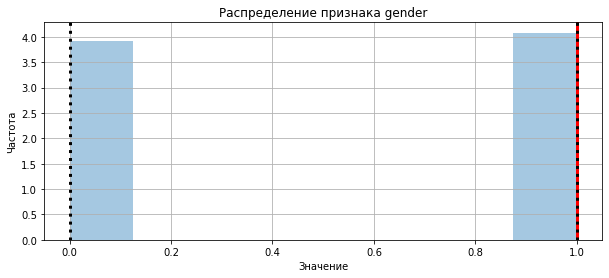

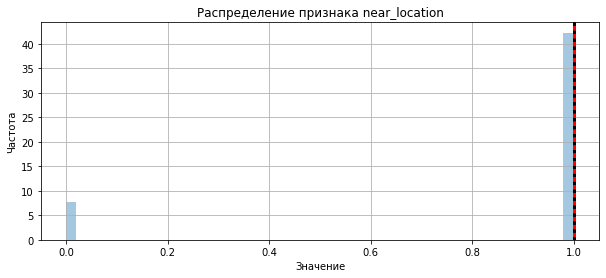

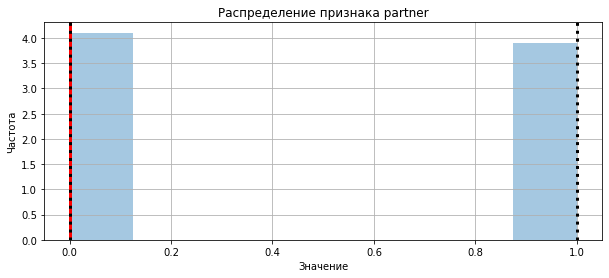

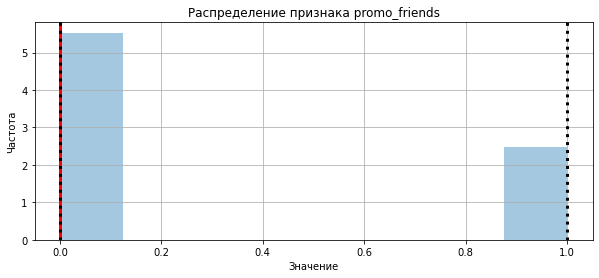

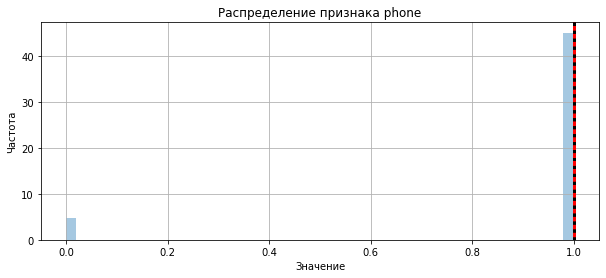

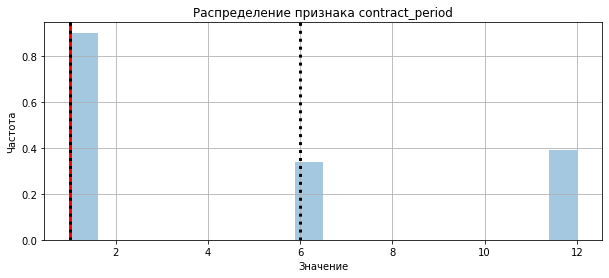

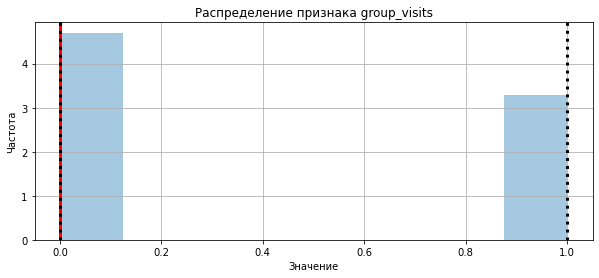

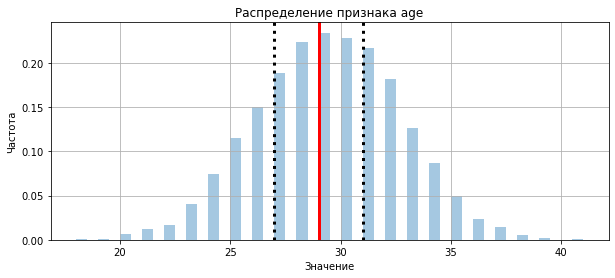

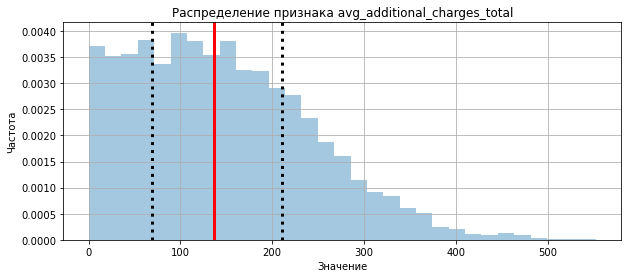

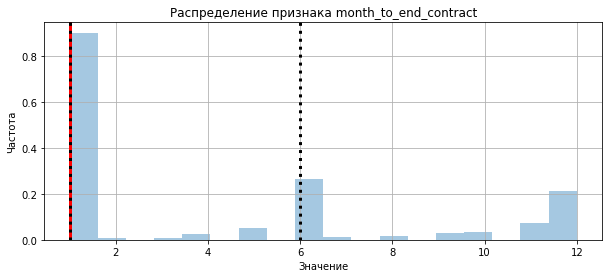

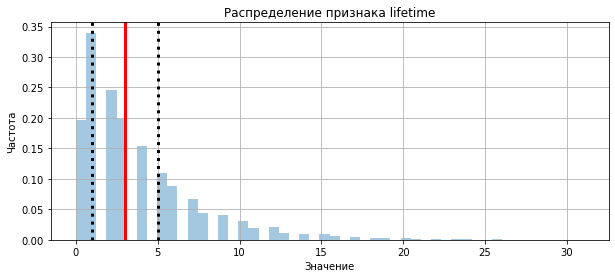

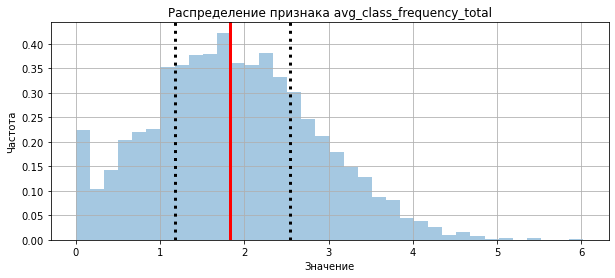

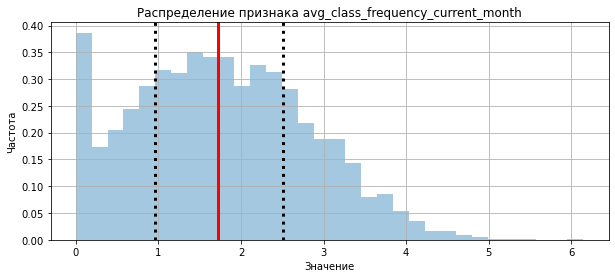

In [12]:
create_hist(data_churn_1, columns)

В общем, выводы практически те же, только теперь отдельно по двум категориям.

**По ушедшим**:

- женщин и мужчин поровну;
- большинство проживает рядом с фитнесс клубом;
- не_сотрудников компаний-партнеров клуба больше, чем сотрудников
- большинство  пришли не по акции "приведи друга";
- подавляющее большинство оставили контакты (телефон);
- у большей части ушедших длительность текущего действующего абонемента -  1 месяц, у остальных - 6 месяцев.
- большая часть не ходила на групповые занятия;
- распределение возраста - по нормальному распределению, медиана около 27 лет;
- рапределение трат на дополнительные услуги смещено влево, медианное значение трат располагается в районе 100 рублей;
- у подавляющего большинства до окончания абонемента оставался 1 месяц;
- медианный "lifetime" (время с момента первого посещения)- около 1 месяца. Почти столько же тех, кто состоял в клубе меньше месяца;
- медиана средней частоты посещений в неделю за предыдущий месяц около 1.


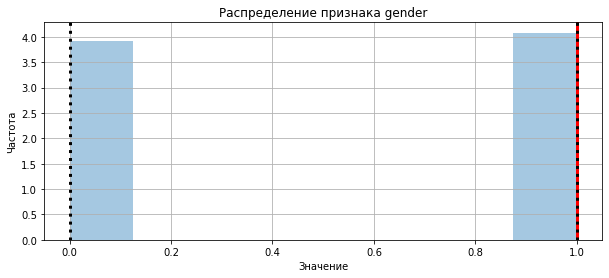

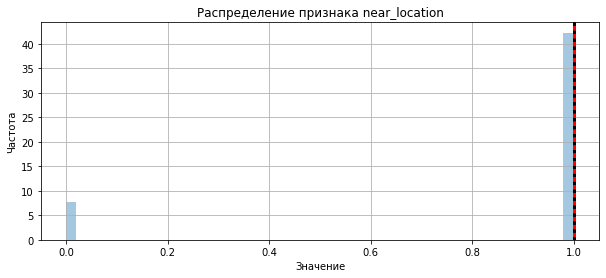

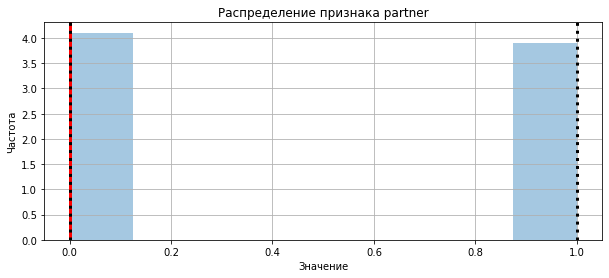

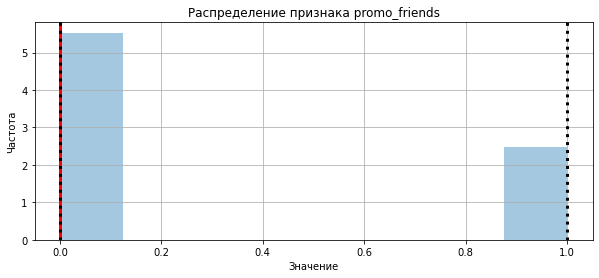

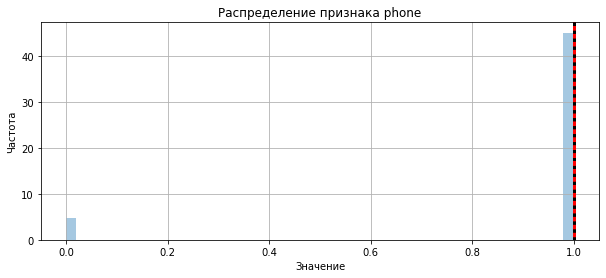

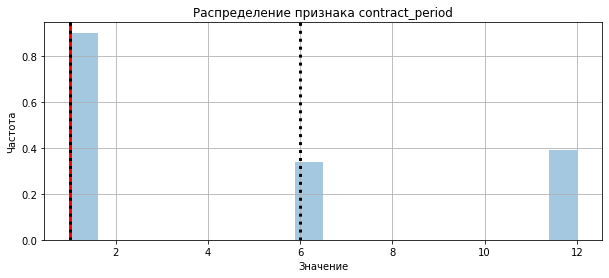

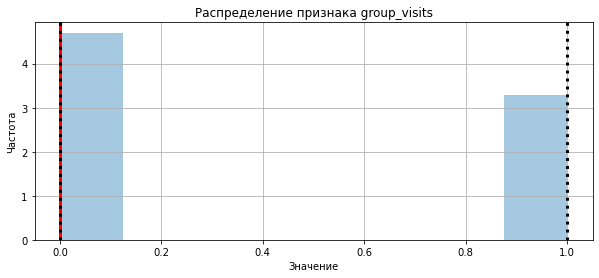

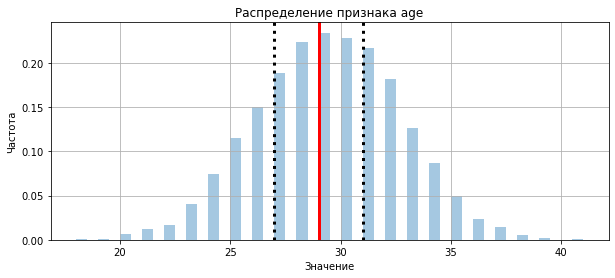

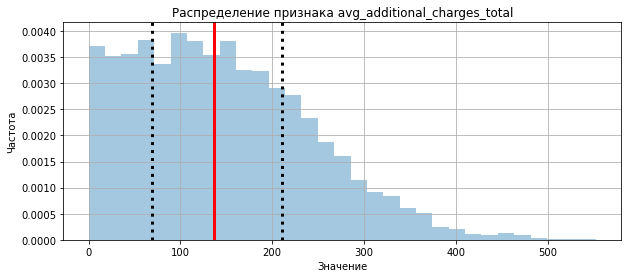

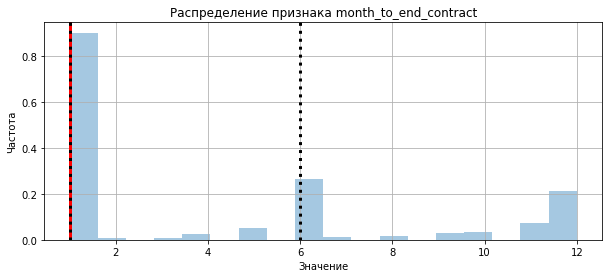

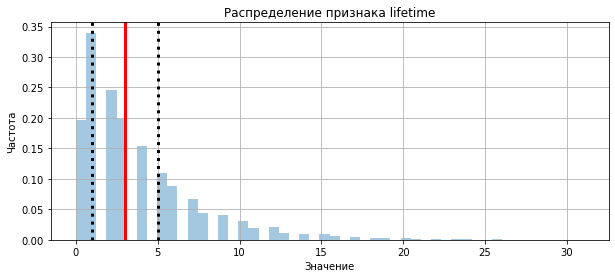

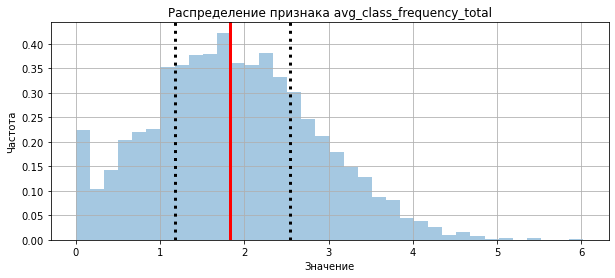

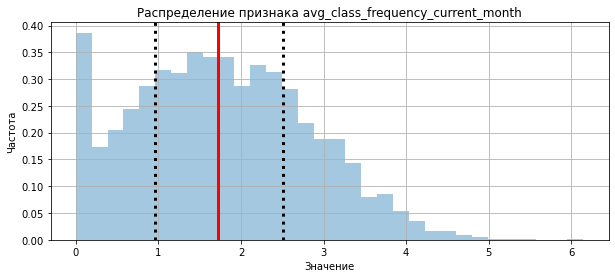

In [13]:
create_hist(data_churn_0, columns)

**По оставшимся**:

- женщин и мужчин поровну;
- большинство проживает рядом с фитнесс клубом;
- не_сотрудников компаний-партнеров и сотрудников почти поровну;
- большинство  пришли не по акции "приведи друга";
- подавляющее большинство оставили контакты (телефон);
- очевидная тройка лидеров по длительности абонемента - 1 месяц, 12 месяцев, 6 месяцев.
- посещения групповых занятий распределились почти поровну;
- распределение возраста - по нормальному распределению, медиана около 30 лет;
- рапределение трат на дополнительные услуги смещено влево, медианное значение трат располагается в районе 150 рублей;
- у большинства до окончания абонемента оставался 1 месяц, также видим две группы, у кого осталось 6 или 12 месяцев;
- медианный "lifetime" (время с момента первого посещения)- 4 месяца;
- медиана средней частоты посещений в неделю за предыдущий месяц - 2 раза.

### Постройте матрицу корреляций и отобразите её.

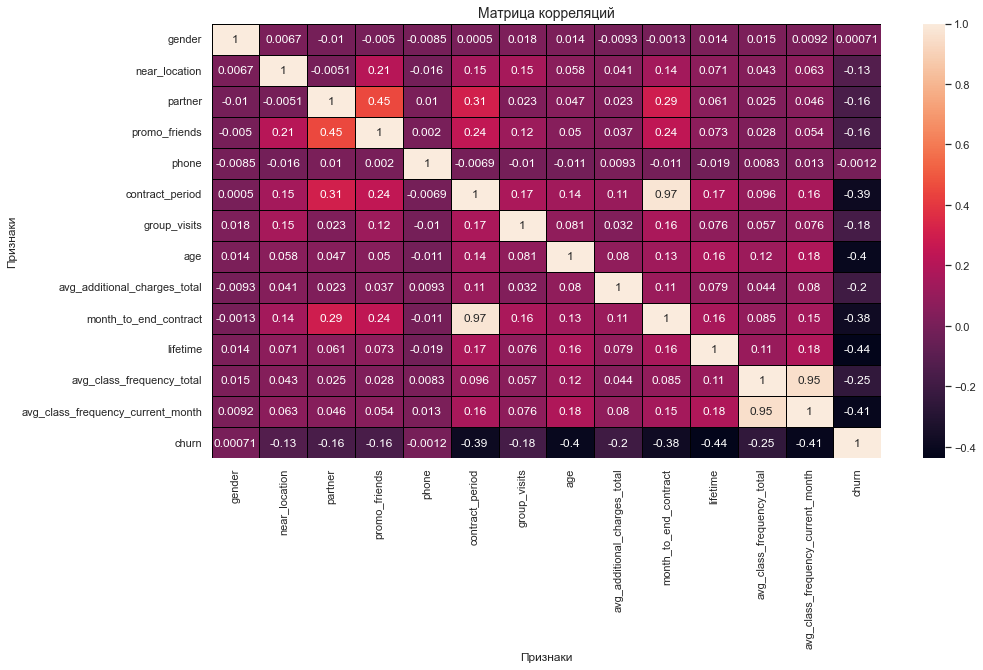

In [14]:
matrix = data.corr()
sns.set(style='white')
plt.figure(figsize=(15, 8))
plt.title('Матрица корреляций', size=14)
ax=sns.heatmap(matrix, annot=True, linewidths=1, linecolor='black')
ax.set_ylabel('Признаки')
ax.set_xlabel('Признаки')
plt.yticks(rotation = 0)

plt.show()

Что мы видим:

- сильная корреляция у двух пар: **contract_period** (срок до окончания текущего действующего абонемента) и **month_to_end_contract** (длительность текущего абонемента) - **0,97** и **avg_class_frequency_total** (средняя частота посещений в неделю) и **avg_class_frequency_current_month** (средняя частота посещений в неделю за предыдущий месяц) - **0,95**.

Если смотреть связь признаков с оттоком, то самая "тесная" связь у этих признаков:

- **lifetime** (-0.44), **age** (-0.4), **avg_class_frequency_current_month** (-0.41), **month_to_end_contract** (-0.38)

Можем сказать, что на отток влияют возраст, время с момента первого обращения, частота посещений, длительность абонемента, срок до его истечения.


## Шаг 3. Постройте модель прогнозирования оттока клиентов

**Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:**

### Разбейте данные на обучающую и валидационную выборку функцией train_test_split().


In [15]:
#разделяем наши данные на признаки (матрица X) и целевую переменную (y)
X = data.drop('churn', axis=1)
y = data['churn']

In [16]:
#разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
#создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler() 
X_train_st = scaler.fit_transform(X_train) #обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

#применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

### Обучите модель на train-выборке двумя способами:
логистической регрессией,
случайным лесом.


In [18]:
#логистическая регрессия
model1 = LogisticRegression(solver='lbfgs', random_state=0)
model1.fit(X_train_st, y_train)
y_pred_1 = model1.predict(X_test_st)

In [19]:
#случайный лес 
model2 = RandomForestClassifier(n_estimators=100, random_state=0)
model2.fit(X_train_st, y_train)
y_pred2 = model2.predict(X_test_st)

### Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

In [20]:
def input(test, pred, title = 'Метрики'):
    print(title)
    print('Accuracy: {:.4f}'.format(accuracy_score(test, pred,)))
    print('Precision: {:.4f}'.format(precision_score(test, pred,)))
    print('Recall: {:.4f}'.format(recall_score(test, pred,)))

In [21]:
input(y_test, y_pred_1, title='Метрики для модели логистической регрессии:')
input(y_test, y_pred2, title = 'Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
Accuracy: 0.9225
Precision: 0.8542
Recall: 0.8283
Метрики для модели случайного леса:
Accuracy: 0.9150
Precision: 0.8385
Recall: 0.8131


Для детального сравнения метрик были выведены 4 цифры после запятой.

Видим, что по всем трем метрикам модель логистическй регрессии показывает себя лучше. При том, что обе модели показывают хорошую долю правильных ответов.

## Шаг 4. Сделайте кластеризацию клиентов

Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):

### Стандартизируйте данные.


In [22]:
scaler = StandardScaler() # создаём объект класса scaler (нормализатор)

In [23]:
#data_drop_churn=data.drop(columns = ['churn'])
x_sc = scaler.fit_transform(data.drop(columns = ['churn']))  # обучаем нормализатор и преобразуем набор данных 

### Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.


In [24]:
linked = linkage(x_sc, method = 'ward') #В переменной linked сохранена таблица «связок» между объектами. Её можно визуализировать как дендрограмму:


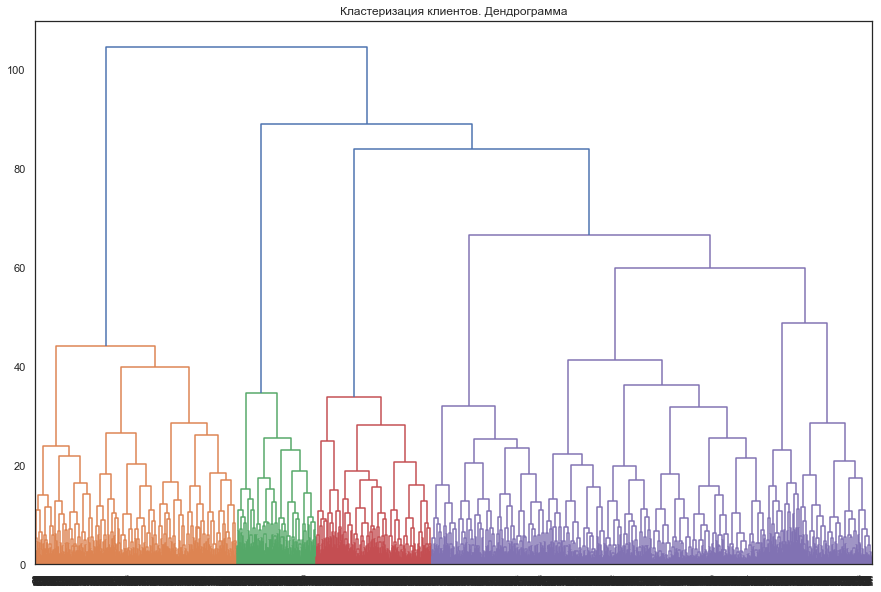

In [25]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация клиентов. Дендрограмма')
plt.show() 


Дендограмма показала нам 4 кластера, но, так как последний  состоит из трех довольно крупных кластеров, то можно говорить например о 6 кластерах.

### Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).


In [26]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(x_sc)


In [27]:
# сохраняем метки кластера в поле нашего датасета
data['cluster_km'] = labels
# выводим статистику по средним значениям наших признаков по кластеру
data_cluster=data.groupby(['cluster_km']).mean()
data_cluster.T

cluster_km,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


### Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?


После кластеризации на основании алгоритма K-Means получили следущее:

1. В 0 кластере оказались клиенты, которые:
- живут близко к клубу, 
- пришли по акции "приведи друга", 
- являются сотрудниками компании-партнёра клуба,
- длительность текущего абонемента у них 10 месяцев, 
- фитнесс клуб они посещают около 5 месяцев, 
- до окончания абонемента у них осталось почти 10 месяцев, 
- они тратят приличные суммы на доп. услуги (160 руб),
- средняя частота посещений в неделю за все время с начала действия абонемента и за последний месяц - почти 2 раза в неделю,
- отток почти нулевой.

2. В 1 кластере оказались клиенты, которые:
- живут близко к клубу, 
- пришли преимущественно не по акции "приведи друга",
- не оставили телефон,
- почти половина является сотрудниками компании-партнёра клуба,
- длительность текущего абонемента у них почти 5 месяцев, 
- фитнесс клуб они посещают около 4 месяцев, 
- до окончания абонемента у них осталось почти 4,5 месяцев, 
- они тратят тоже не мало на доп. услуги (143 руб),
- средняя частота посещений в неделю за все время с начала действия абонемента и за последний месяц - почти 2 раза в неделю,
- отток почти 26%.

3. В 2 кластере оказались клиенты, которые:
- живут далеко от клуба, 
- почти все пришли не по акции "приведи друга",
- меьшая часть является сотрудниками компании-партнёра клуба,
- абонемент на 2 месяца, ходят почти 3 месяца, до окончания абонемента - 2 месяца, 
- тратятся на доп. услуги,
- менее интенсивно посещают занятия,
- отток почти половина (44%).

4. В 3 кластере оказались клиенты, которые:
- все живут рядос с клубом, 
- меньшая часть пришла по акции "приведи друга",
- еще меньшая часть является сотрудниками компании-партнёра клуба,
- абонемент на 2 месяца, ходят 2,4 месяца, до окончания абонемента - 1,5 месяца, 
- тратятся на доп. услуги,
- не часто посещают занятия,
- отток 51%.

4. В 4 кластере оказались клиенты, которые:
- почти все живут рядом с клубом, 
- меньшая часть пришла по акции "приведи друга",
- меньшая часть является сотрудниками компании-партнёра клуба,
- абонемент на 2,6 месяца, ходят почти 5 месяца, до окончания абонемента - 2,4 месяца, 
- тратятся на доп. услуги,
- очень часто посещают занятия,
- отток почти нулевой.

### Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?


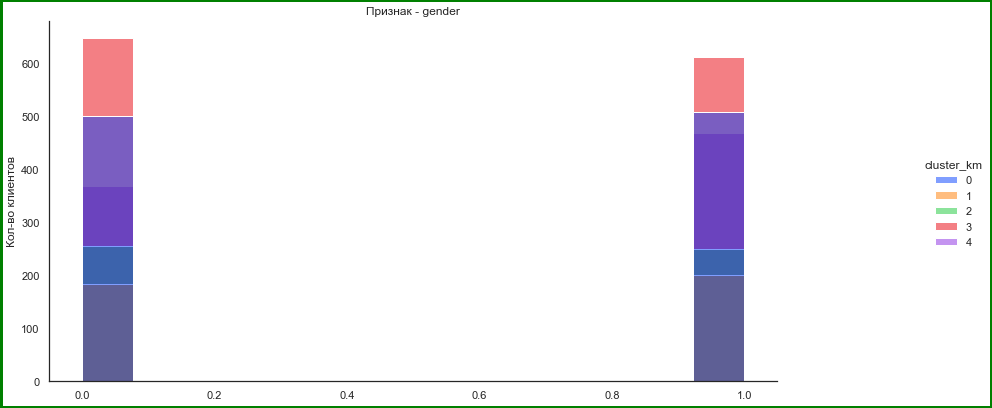

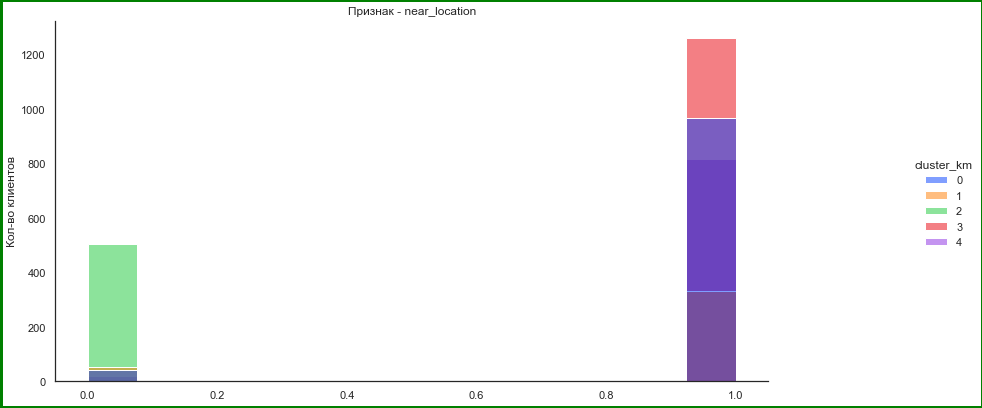

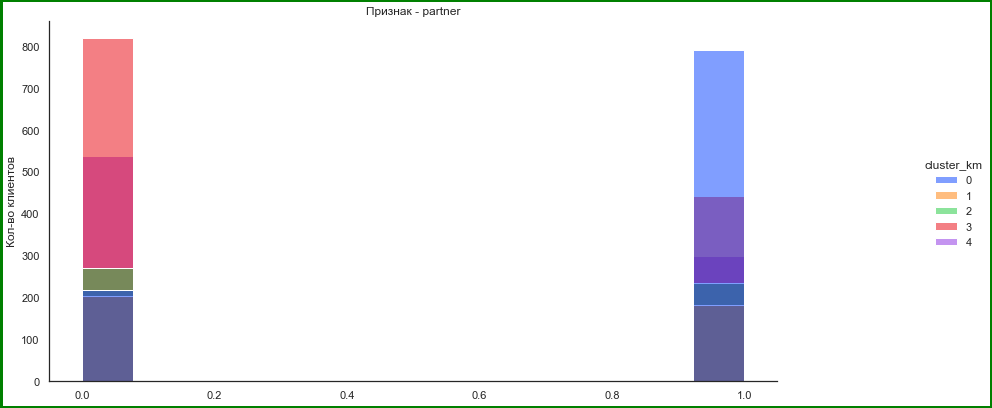

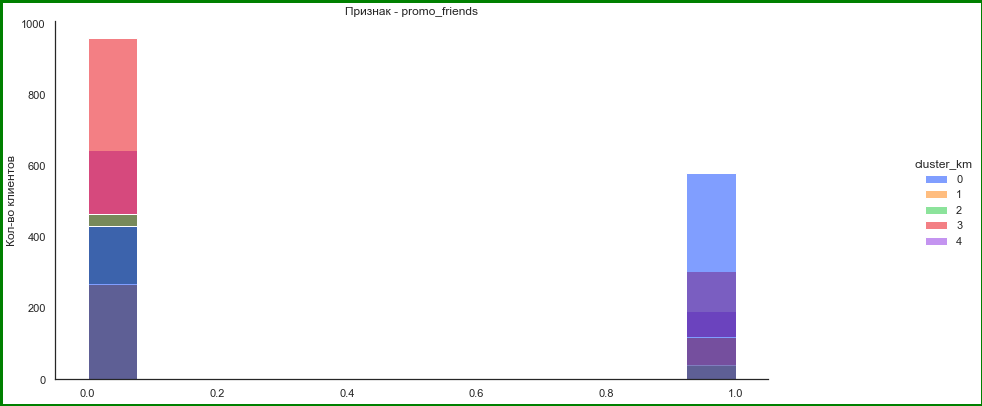

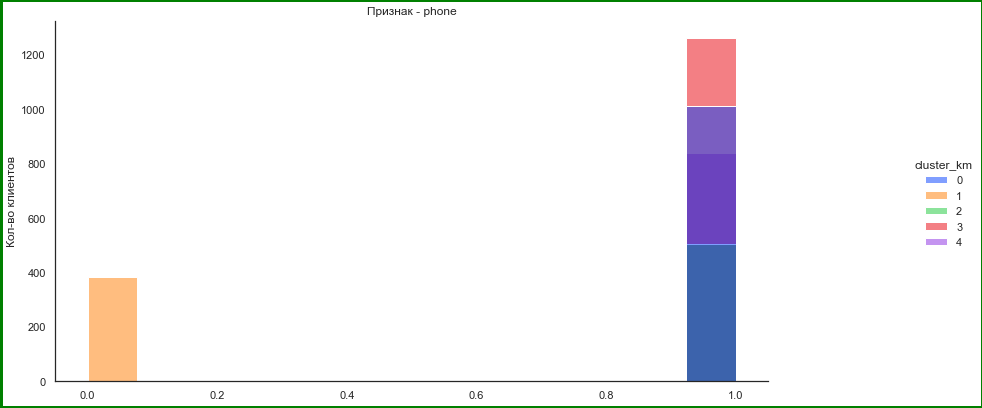

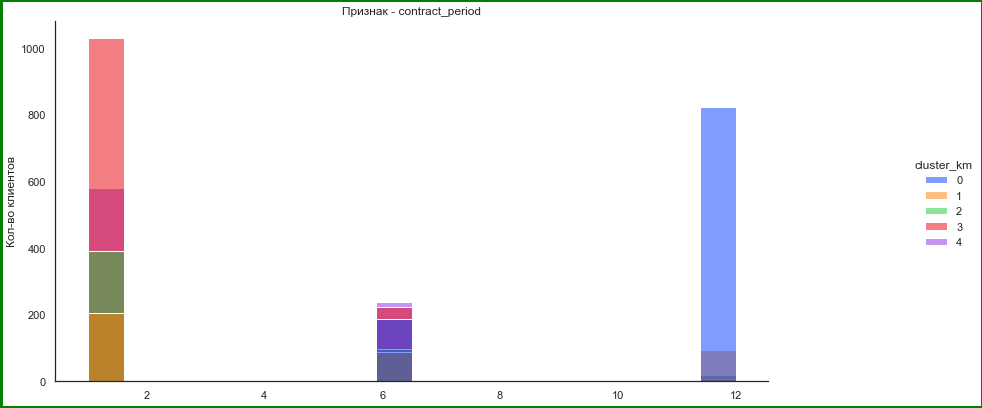

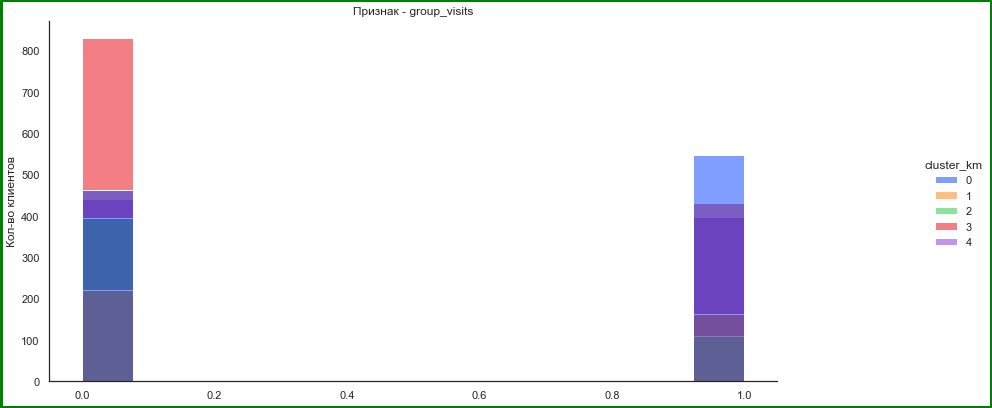

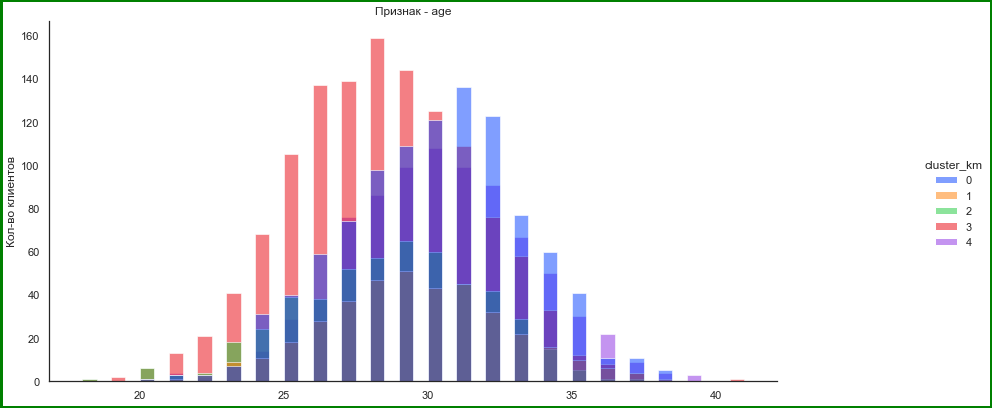

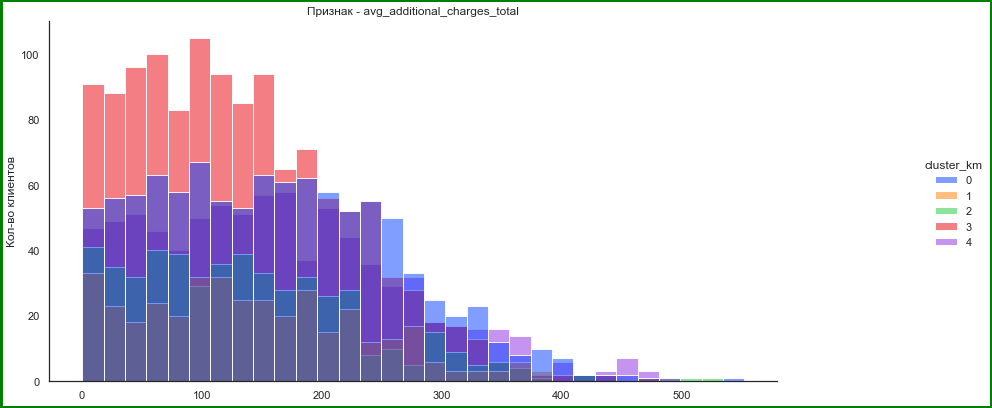

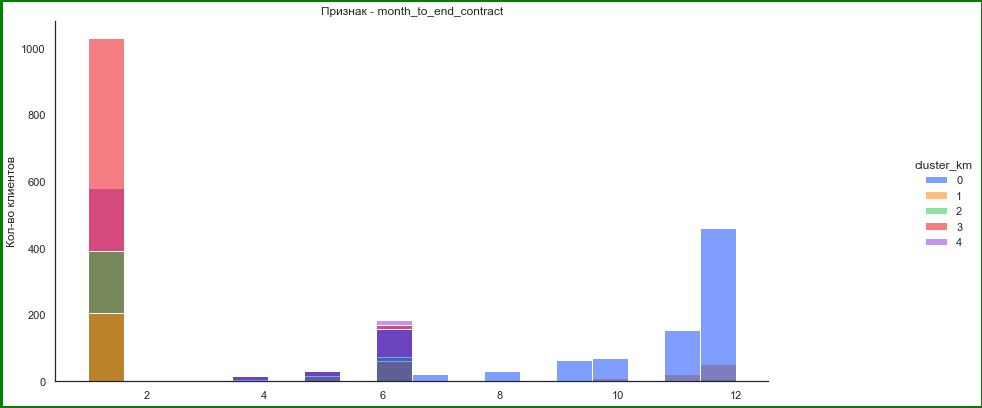

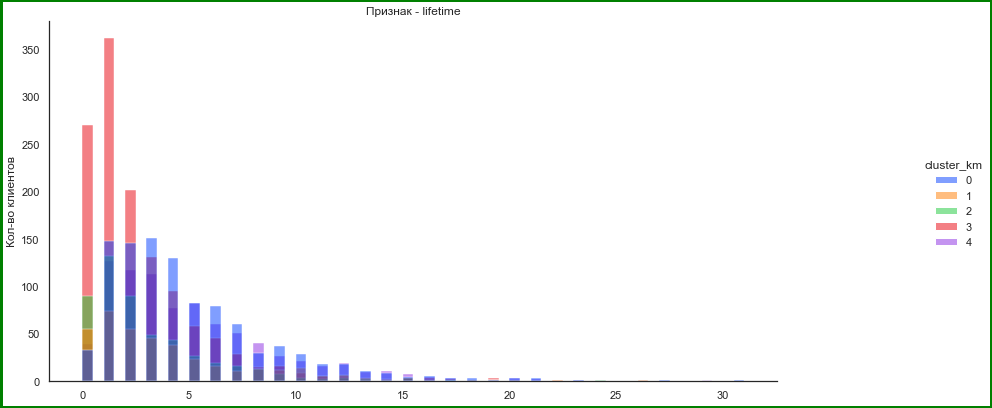

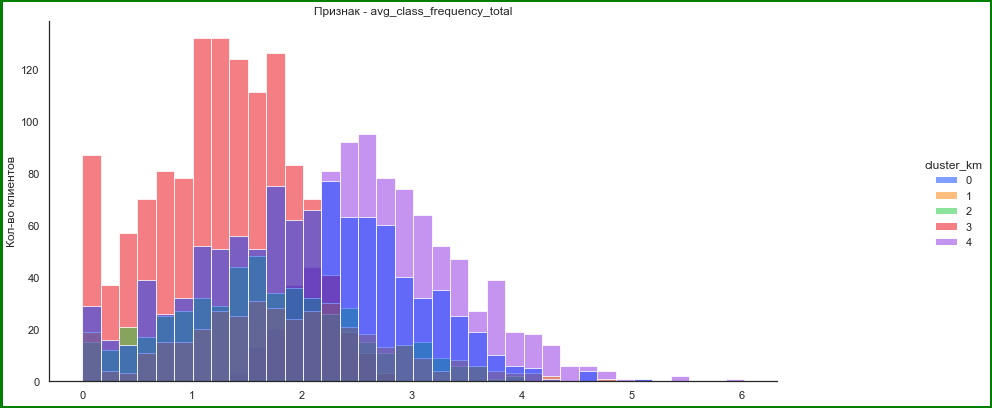

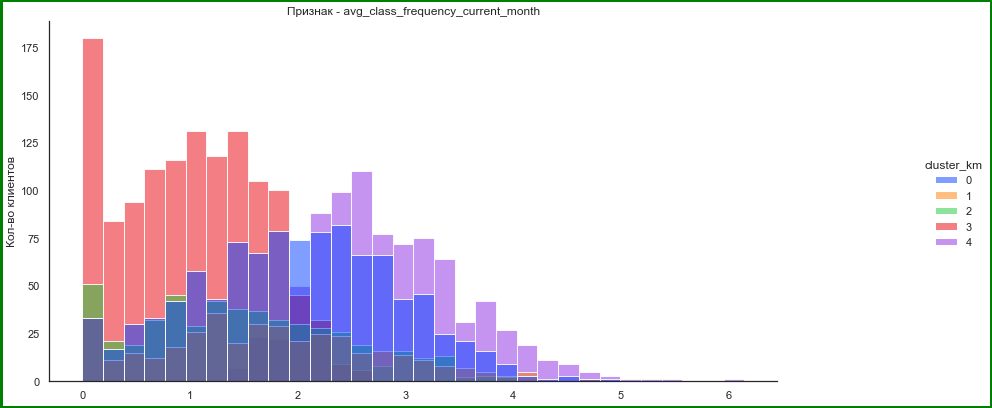

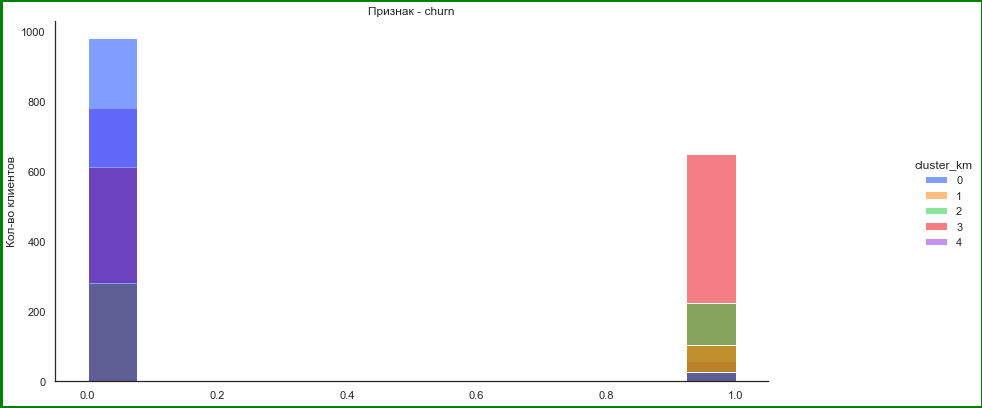

In [28]:
columns=data.columns.tolist()
columns.remove('cluster_km')
for f in columns:
    g = sns.displot(data, x=data[f], hue='cluster_km', palette="bright", kind='hist' ) # 'hist', 'kde', 'ecdf'
    plt.title(f'Признак - {f}')
    plt.ylabel("Кол-во клиентов")
    plt.xlabel("")
    g.fig.set_figwidth(15)
    g.fig.set_figheight(6)
    g.fig.patch.set_linewidth(5)
    g.fig.patch.set_edgecolor('green')

- **'gender'** - везде поровну;
- **'Near_Location'** — выделяется кластер2, где собраны клиенты, живущие не близко к клубу, а также 0 и 4, где близко;
- **'Partner'** — в кластере 0 - больше всего клиентов-сотрудников компаний-партнеров;
- **Promo_friends** — в кластере 2 меньше всего клиентов, пришедших по акции, в кластере 0 - таких больше всего в сравнении с другими кластерами;
- **'Phone'** — выделился кластер 1, где все клиенты не указали контакты;
- **'Age'** — не много что нам показывает важного;
- **'Lifetime'** — 0 и 4 кластеры с самыми длинными сроками посещений клуба;
- **'Contract_period'** — выделяется кластер 0, где собраны клиенты с самыми длинными абонементами;
- **'Month_to_end_contract'** — меньше всего времении до окончания абонемента осталось у клиентов из кластера 3;
- **'Group_visits'** — в 0 и 4 кластерах часто посещают такие знятия;
- **'Avg_class_frequency_total'** — в 4 кластере клиенты часто занимаются;
- **'Avg_class_frequency_current_month'** — и в 4 кластере опять же часто занимаются и по показателям в месяц;
- **'Avg_additional_charges_total'** — чуть больше трат в 4 кластере.
- **'Churn'** — в 0 и 4 кластере собраны клиенты с маленьким оттоком, в 2 и 4 - с оттоком в районе 50%.

### Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [29]:
churn_share = data.groupby('cluster_km')['churn'].count().reset_index().rename(columns={'churn':'all customers'})
churn_share=churn_share.reset_index()
churn_share['churn'] = data.query('churn==1').groupby('cluster_km')['churn'].count()
churn_share['churn_share_%'] = round(churn_share['churn']/churn_share['all customers']*100, 2)
#последняя колонка- доля оттока
churn_share['churn_share'] = round(churn_share['churn']/churn_share['all customers'], 4)
churn_share

,index,cluster_km,all customers,churn,churn_share_%,churn_share
0,0,0,1010,28,2.77,0.0277
1,1,1,385,103,26.75,0.2675
2,2,2,505,224,44.36,0.4436
3,3,3,1262,649,51.43,0.5143
4,4,4,838,57,6.80,0.0680


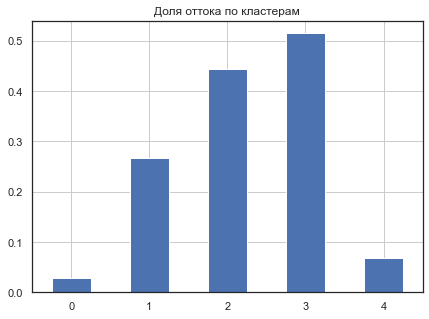

In [30]:
churn_share['churn_share'].plot(kind = 'bar', grid = True, figsize=(7,5))
plt.title('Доля оттока по кластерам')
plt.xticks(rotation=0)
plt.show()

Хуже всего "сохраняются" 2 и 3 кластеры, тогда как в 0 и 4 кластерах отток минимален.

## Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

**На основании данных о клиентах клуба «Культурист-датасаентист» проведена следующая работа:**

**Для прогнозирования оттока клиентов** были построены модели "Логистическая регрессия" и "Случайный лес". Обе модели показали хорошие метрики -  accuracy, precision и recall, при этом "Логистическая регрессия" дает результат немного лучше чем "Случайный лес".



**Сформированы типичные портреты клиентов:**

**Тип1 (отток 2.7%)**
- живут близко к клубу, 
- пришли по акции "приведи друга", 
- являются сотрудниками компании-партнёра клуба,
- длительность текущего абонемента у них 10 месяцев, 
- фитнесс клуб они посещают около 5 месяцев, 
- до окончания абонемента у них осталось почти 10 месяцев, 
- они тратят приличные суммы на доп. услуги (160 руб),
- средняя частота посещений в неделю за все время с начала действия абонемента и за последний месяц - почти 2 раза в неделю.

**Тип2 (отток 26.7%)**
- живут близко к клубу, 
- пришли преимущесвенно не по акции "приведи друга",
- не оставили телефон,
- почти половина является сотрудниками компании-партнёра клуба,
- длительность текущего абонемента у них почти 5 месяцев, 
- фитнесс клуб они посещают около 4 месяцев, 
- до окончания абонемента у них осталось почти 4,5 месяцев, 
- они тратят тоже не мало на доп. услуги (143 руб),
- средняя частота посещений в неделю за все время с начала действия абонемента и за последний месяц - почти 2 раза в неделю.

**Тип3 (отток 44.3%)**
- живут далеко от клуба, 
- почти все пришли не по акции "приведи друга",
- меьшая часть является сотрудниками компании-партнёра клуба,
- абонемент на 2 месяца, ходят почти 3 месяца, до окончания абонемента - 2 месяца, 
- тратятся на доп. услуги,
- менее интенсивно посещают занятия.

**Тип4 (отток 51.43%)**
- все живут рядом с клубом, 
- меньшая часть пришла по акции "приведи друга",
- меньшая часть является сотрудниками компании-партнёра клуба,
- абонемент на 2 месяца, ходят 2,4 месяца, до окончания абонемента - 1,5 месяца, 
- тратятся на доп. услуги,
- не часто посещают занятия.

**Тип5 (отток 6.8%)**
- почти все живут рядом с клубом, 
- меньшая часть пришла по акции "приведи друга",
- меньшая часть является сотрудниками компании-партнёра клуба,
- абонемент на 2,6 месяца, ходят почти 5 месяца, до окончания абонемента - 2,4 месяца, 
- тратятся на доп. услуги,
- очень часто посещают занятия.

**Выявлены признаки, наиболее сильно влияющие на отток:**
- проживание или работа в районе, где находится фитнес-центр: если клиент живет/работаетне рядом с клубом, велика вероятность, что он перестанет ходить, 
- пришел ли клиент по акции "приведи друга": если клиент пришел сам, в первую очередь рассказать ему о групповых занятиях, мало кто сразу знает, что делать в клубе, а на групповых занятиях есть общение с тренером и с посетителями этих занятий,
- посещает ли клиент групповые занятия, см предыдущий пункт,
- сколько времени уже посещает клуб - новым клиентам уделять больше внимания, стимулировать акицями, вниманием персонала, предложить скидку или индивидуальные услуги.

**Меры по удержанию клиентов:**
- разнообразие как индивидуальных, так и групповых тренировок,их реклама как в клубе, так и в социяльных сетях,
- акции, спецпредложения для тех, кто тратит время/деньги на дорогу,
- персональное внимание к клиентам, small talk на входе и на выходе, например, заметить, как клиент выглядит (хорошо!!),
- внимание к пожеланиям и просьбам клиентов,
- мониторинг посещаемости, если клиент стал реже ходить - возможно сделать ему звонок и рассказать о новых предложениях,
- аналогично с групповыми занятиями, если у клиента снижается их посещаемость, выяснить, почему.
- держать на контроле тех клиентов, у кого истекает абонемент, и тех, кто купил абонемент на 1-3 месяца.